# General information about this notebook

This notebook devides this dataset to three following categories: Healthy, Bacterial-pneumonia and Viral-pneumonia. If a chest xray is classified as the two latters, the person is thus infected with covid-19. The reason i didnt combine bacterial and viral pneumonia in one category, namely covid, is that there are different features in images which shows if someone has a bacterial or viral infection. Combining this two in one category would thus mess up the training data and accuracy. 

Another important note is that this dataset has different amount of data in respective category which affects the accuracy result. For example we have 2000+ xray images of bacterial-pneumonia and only roughly 1400 images of healthy lungs. 

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import shutil
import os

# Examining the dataset

In [3]:
metadata=pd.read_csv("../input/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv")
metadata.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


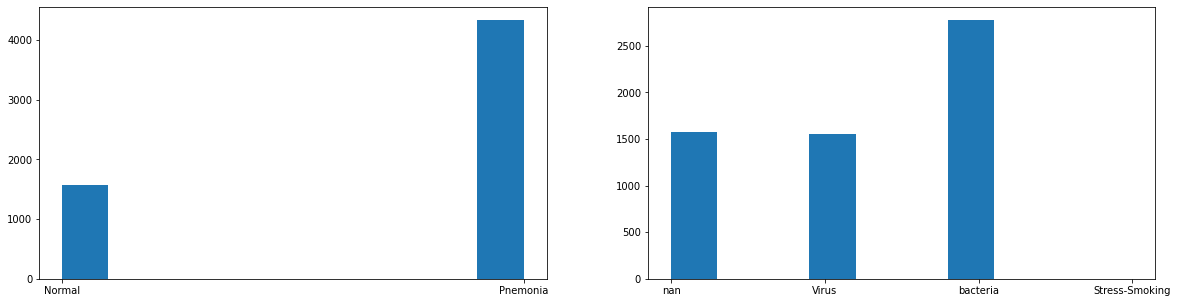

In [4]:
fig, ax = plt.subplots(1, 2,figsize=(20, 5))
ax[0].hist(metadata['Label']);
ax[1].hist(metadata['Label_1_Virus_category'].astype(str));

# Divide the data to three categories as mentioned in beginning

In [5]:
#get training data and testing data separatly from the metadata csv file
train_df = metadata[metadata['Dataset_type'] == 'TRAIN']
test_df = metadata[metadata['Dataset_type'] == 'TEST']

In [6]:
#Divide each virus with corresponding images to different variables
train_virus = train_df[train_df.Label_1_Virus_category == 'Virus']['X_ray_image_name']
train_bacterial=train_df[train_df.Label_1_Virus_category == 'bacteria']['X_ray_image_name']
train_normal=train_df[train_df.Label == 'Normal']['X_ray_image_name']

len(train_virus),len(train_bacterial),len(train_normal)

(1407, 2535, 1342)

**Split the data to test,valid and training**

In [7]:
def split_to_training_validation(data,split=0.2):
    """
    This function takes a data series and split 20% of it to validation set and 80% to training set
    
    Args:
    data -> data series images
    split -> parameter to split
    
    returns a validation and training set
    """
    
    valid_data=data[:round(split*len(data))]
    train_data=data[round(split*len(data)):]
    
    return valid_data, train_data

In [8]:
valid_virus,train_virus=split_to_training_validation(train_virus)
valid_bacterial,train_bacterial=split_to_training_validation(train_bacterial)
valid_normal,train_normal=split_to_training_validation(train_normal)

len(train_virus),len(valid_virus), len(valid_normal),len(train_normal)

(1126, 281, 268, 1074)

In [9]:
lables=['Healthy','Viral-pneumonia','Bacterial-pneumonia']
training_data_classes=[train_normal,train_virus,train_bacterial]
source='../input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'

for i in range(0,len(lables)):
    target='/dataset/train/'+lables[i] #choose where the data from kaggle should be placed
    
    os.makedirs('/dataset/train/'+lables[i]) #create new folder with lables
    move=training_data_classes[i]
    for j in move:
        #move everything from source path to new target path as iterating through the labels
        path=os.path.join(source,j)
        shutil.copy(path,target)

In [10]:
validation_data_classes=[valid_normal,valid_virus,valid_bacterial]
for i in range(0,len(lables)):
    target='/dataset/valid/'+lables[i] #choose where the data from kaggle should be placed
    
    os.makedirs('/dataset/valid/'+lables[i]) #create new folder with lables
    move=validation_data_classes[i]
    for j in move:
        #move everything from source path to new target path as iterating through the labels
        path=os.path.join(source,j)
        shutil.copy(path,target)

In [11]:
test_virus = test_df[test_df.Label_1_Virus_category == 'Virus']['X_ray_image_name']
test_bacterial=test_df[test_df.Label_1_Virus_category == 'bacteria']['X_ray_image_name']
test_normal=test_df[test_df.Label == 'Normal']['X_ray_image_name']

len(test_virus),len(test_bacterial),len(test_normal)

(148, 242, 234)

In [12]:
classes=[test_normal,test_virus,test_bacterial]
source='../input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'

for i in range(0,len(lables)):
    
    target='/dataset/test/'+lables[i] #choose where the data from kaggle should be placed 
    
    os.makedirs('/dataset/test/'+lables[i]) #create new folder with lables
    move=classes[i]
    for j in move:
        #move everything from source path to new target path as iterating through the labels
        path=os.path.join(source,j)
        shutil.copy(path,target)

**Get class names to confirm the division is done right**

In [13]:
import pathlib

#Print out classes from the created directory
data_dir = pathlib.Path("/dataset/valid")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['Bacterial-pneumonia' 'Healthy' 'Viral-pneumonia']


**Plot one random image of bacterial-pneumonia lung (it can be changed to others by changing the target_class arg)**

In [14]:
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory 
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read in the image and plot it using matplotlib
    plt.figure(figsize=(7, 5))
    plt.subplot(1, 1,1)
    
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img,cmap='gray')
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

['person1338_bacteria_3395.jpeg']
Image shape: (992, 1440)


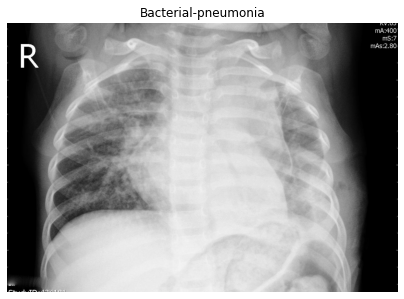

In [15]:
#dir and class can be changed
image_1= view_random_image(target_dir="/dataset/valid/",
                        target_class="Bacterial-pneumonia")

# Preprocessing data for the neural network

* Validation is used when fitting the model
* This ensures that hyperparameter tuning isnt chosen based on the unseen test data

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (224, 224)
BATCH_SIZE = 64

tf.random.set_seed(42)

#Define training and testing directories
train_dir = "/dataset/train"
valid_dir="/dataset/valid"
test_dir = "/dataset/test"

#Normalize images
train_aug = ImageDataGenerator(rescale=1/255.,
                               shear_range=0.1,
                               rotation_range=20,
                               zoom_range=0.1)

valid_gen=ImageDataGenerator(rescale=1/255.)
test_gen = ImageDataGenerator(rescale=1/255.)


train_data = train_aug.flow_from_directory(train_dir,
                                          target_size=IMG_SIZE,
                                          color_mode='grayscale',
                                          batch_size=BATCH_SIZE,
                                          class_mode="categorical")

valid_data=valid_gen.flow_from_directory(valid_dir,
                                        target_size=IMG_SIZE,
                                        color_mode='grayscale',
                                        batch_size=BATCH_SIZE,
                                        class_mode="categorical")

test_data = test_gen.flow_from_directory(test_dir,
                                        target_size=IMG_SIZE,
                                        color_mode='grayscale',
                                        batch_size=BATCH_SIZE,
                                        class_mode="categorical")

Found 4228 images belonging to 3 classes.
Found 1056 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


* **4228** images for training
* **1056** for validation
* **624** for testing purpose

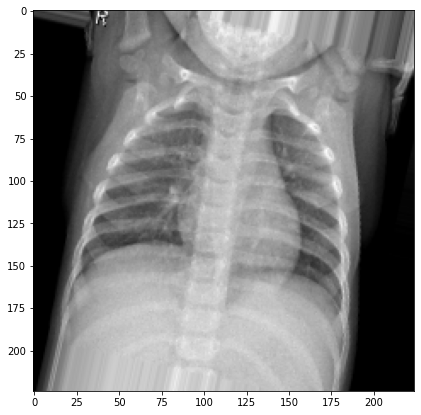

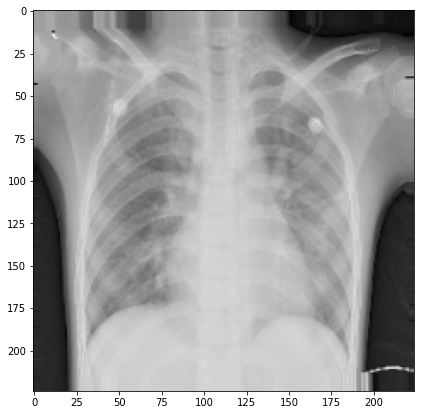

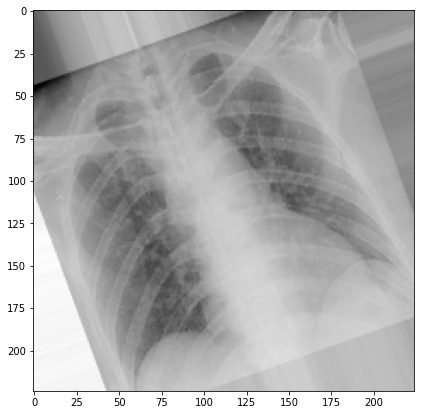

In [41]:
#Plot three images of augmented training data
for _ in range(3):
    img, label = train_data.next()
    plt.figure(figsize=(7, 7))
    plt.imshow(img[0],cmap="gray")
    plt.show()

In [19]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):

    #store log files with filepath to tensorboard
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
    )
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

**Create sequential deep learning model**

* Get prediction probabilites later on using softmax activation function in dense layer
* Use categorical crossentropy as loss metric

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation,BatchNormalization, Dropout

#Create model, increase filter and decrease kernel as going deeper since pixels are bigger than 128x128. This is the AlexNet neural netowrk
#architecture

model=Sequential([
    Conv2D(96, 11, 4, activation='relu', input_shape=(224,224,1)),
    BatchNormalization(),
    MaxPool2D(3, 2),
    Conv2D(256, 5, 1, activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(3, 2),
    Conv2D(384, 3, 1, activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(384,3, 1, activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(256, 3, 1, activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(3, 2),
    Flatten(),
    Dense(4096, activation='relu'),
    
    #set dropout to regularize
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,decay=1e-5),
                metrics=["AUC"])

In [22]:
# Set checkpoint path
checkpoint_path = "weights/checkpoint.ckpt"

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_best_only=True,
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [23]:
# Fit the model saving checkpoints every epoch
epochs = 50

#Train the model with 150 epochs
history = model.fit(train_data,
                          epochs=epochs,
                          steps_per_epoch=train_data.samples//BATCH_SIZE,
                          validation_data=valid_data,
                          validation_steps=len(valid_data),
                          callbacks=[create_tensorboard_callback(dir_name="history_callback",
                                                                                 experiment_name="Chest_Xray"),
                                                     checkpoint_callback])



Saving TensorBoard log files to: history_callback/Chest_Xray/20210905-085319
Epoch 1/50
66/66 [==============================] - 74s 1s/step - loss: 13.9580 - auc: 0.6583 - val_loss: 5.0723 - val_auc: 0.5952

Epoch 00001: val_loss improved from inf to 5.07229, saving model to weights/checkpoint.ckpt
Epoch 2/50
66/66 [==============================] - 66s 1s/step - loss: 0.8349 - auc: 0.8271 - val_loss: 6.8225 - val_auc: 0.4688

Epoch 00002: val_loss did not improve from 5.07229
Epoch 3/50
66/66 [==============================] - 66s 999ms/step - loss: 0.7392 - auc: 0.8536 - val_loss: 3.7397 - val_auc: 0.5847

Epoch 00003: val_loss improved from 5.07229 to 3.73968, saving model to weights/checkpoint.ckpt
Epoch 4/50
66/66 [==============================] - 66s 993ms/step - loss: 0.6986 - auc: 0.8669 - val_loss: 3.5052 - val_auc: 0.6322

Epoch 00004: val_loss improved from 3.73968 to 3.50517, saving model to weights/checkpoint.ckpt
Epoch 5/50
66/66 [==============================] - 65s 9

**Evaluating the model as it currently is versus the best fitted model during training**

In [42]:
model.evaluate(test_data)

10/10 [==============================] - 5s 467ms/step - loss: 1.0133 - auc: 0.7500


[1.0132540464401245, 0.7500103116035461]

In [25]:
#Load best weights from the saved model on checkpoint
model_best_weights= tf.keras.models.load_model('weights/checkpoint.ckpt')

### The model with best weights achieved an accuracy of roughly 82%

In [26]:
model_best_weights.evaluate(test_data)

10/10 [==============================] - 6s 527ms/step - loss: 0.9109 - auc: 0.8200


[0.910900890827179, 0.8199741840362549]

# Prediction and visualization

* Predictions are made with the model fitted with best weights. Perhaps better result could be achieved by training longer

In [27]:
y_pred = model_best_weights.predict(test_data)
y_pred.shape

(624, 3)

In [28]:
y_pred

array([[2.4299717e-01, 3.2426649e-01, 4.3273631e-01],
       [4.1050252e-01, 1.3102741e-02, 5.7639474e-01],
       [1.7657185e-01, 3.3528730e-01, 4.8814085e-01],
       ...,
       [8.3093786e-01, 1.1666692e-03, 1.6789545e-01],
       [9.3909049e-01, 6.2963125e-05, 6.0846649e-02],
       [9.0629703e-01, 1.5640153e-04, 9.3546599e-02]], dtype=float32)

**Predict randomly and plot**

This section takes 4 images out of testing data and classifies them using the model that was trained

The actual and predicted categories plus their prediction probability is also plotted

In [31]:
# Create a function to load and prepare images for prediction
def load_and_prep_image(filename, img_shape=224, scale=True):

  # Read in the image
    img = tf.io.read_file(filename)

    # Decode image into tensor
    img = tf.io.decode_image(img, channels=1)

    # Resize the image
    img = tf.image.resize(img, [img_shape, img_shape])

    # Scale? Yes/no
    if scale:
    # rescale the image (get all values between 0 and 1)
        return img/255.
    else:
        return img 

(1, 224, 224, 1)
[[0.20523421 0.21394338 0.5808224 ]]
IM-0037-0001.jpeg
(1, 224, 224, 1)
[[0.476078   0.00419932 0.51972264]]
person42_virus_89.jpeg
(1, 224, 224, 1)
[[0.00351723 0.98257715 0.01390564]]
IM-0103-0001.jpeg
(1, 224, 224, 1)
[[0.766785   0.00187098 0.2313441 ]]
person155_bacteria_730.jpeg


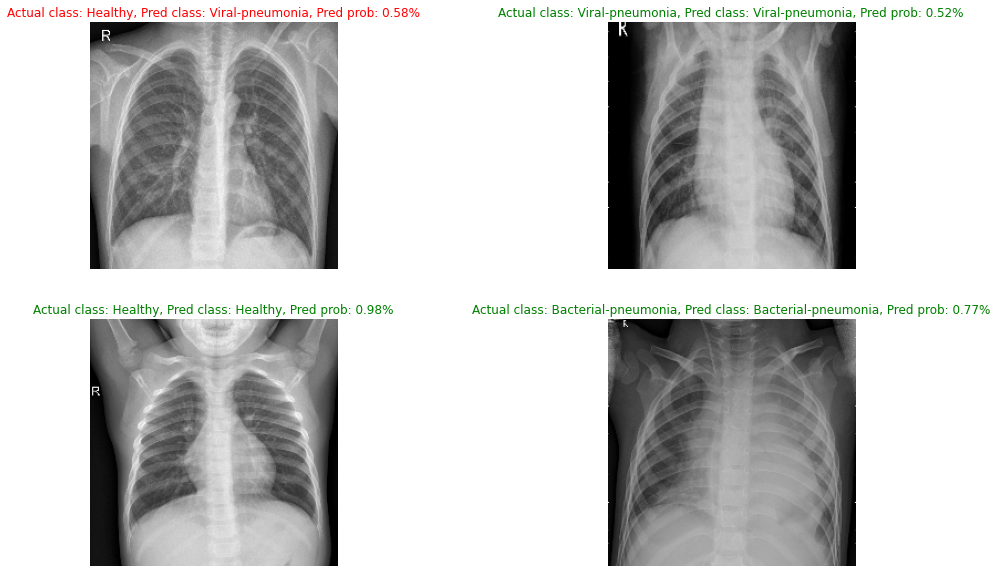

In [36]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))

#get for random images from testdataset and use model to predict infection
for i in range(4):
    
  # Choose random image(s) from random class(es)
    class_name = random.choice(class_names)
    filename = random.choice(os.listdir(test_dir + "/" + class_name))
    filepath = test_dir + "/"+ class_name + "/" + filename

    # Load the image and make predictions
    img = load_and_prep_image(filepath)
    
    img_expanded = tf.expand_dims(img, axis=0)
    print(img_expanded.shape)
    pred_prob = model_best_weights.predict(img_expanded) # get prediction probabilities array
    pred_class = class_names[pred_prob.argmax()] # get highest prediction probability index and match it class_names list
    #slice out last dimension
    img = img[:,:,0]
    print(pred_prob)
    plt.subplot(2, 2,i+1)
    # Plot the images
    print(filename)
    plt.imshow(img,cmap='gray')
    if (class_name == pred_class): # if predicted class matches truth class, make text green
        title_color = "g"
    else:
        title_color = "r"
    plt.title(f"Actual class: {class_name}, Pred class: {pred_class}, Pred prob: {pred_prob.max():.2f}%", c=title_color)
    plt.axis(False);

# Discussion

* The above cell can be used as a further method of checking how the model performs

* If the dataset contained more image data of healthy lungs then the reslut wouldve been better

* The missclassified image has a probability of 58% which shows that even the model is not confident enough of its own prediction, which is self explanatory that it needs more image data of healthy lungs

* The reason i didnt use transfer learning on this dataset is that it will only learn patterns in pneumonia tensors since they are alot more examples of this type in this dataset than healthy lungs. The RUC gives an accuracy of 92% using transfer learning, but when you visualize your result it will only be able to predict with a fixed probability every single time, thus i only used the network architechtur of AlexNet to train the network and it now has learned the dataset with AUC of 82% and is also able to predict with less "false positives" than transfer learning

* **Future work:** Apply VGG16 architecture on this dataset and compare with AlexNet without using transfer learning